In [1]:

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement
import functools

import assgn2 as asn



In [2]:

df = pd.read_csv('Dataset/winequality-red.csv',sep = ';')

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df = df.sample(frac=1) 

In [5]:
X = df.drop(columns = 'quality') #data matrix
y = df['quality']  #quality

X = np.array(X)  # to np array 
y = np.array(y)   # to np array

In [6]:
best_features = ['volatile acidity', 'density', 'pH', 'sulphates', 'alcohol']
best_df = df[best_features]
X = np.array(best_df)

In [7]:
def split_trainTest(X,y,t):
    train_size = int((1-t) * X.shape[0])   
    return X[:train_size],X[train_size:],y[:train_size],y[train_size:]

In [8]:
X_train, X_test, y_train, y_test = split_trainTest(X,y,t=0.2)

In [9]:
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_test = (X_test - np.mean(X_test))/np.std(X_test)

In [10]:
'''
import warnings
warnings.filterwarnings('ignore')


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);
'''

'\nimport warnings\nwarnings.filterwarnings(\'ignore\')\n\n\n# Matplotlib and seaborn for plotting\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\nimport seaborn as sns\nfrom scipy import stats\n\n# Calculate correlation coefficient\ndef corrfunc(x, y, **kws):\n    r, _ = stats.pearsonr(x, y)\n    ax = plt.gca()\n    ax.annotate("r = {:.2f}".format(r),\n                xy=(.1, .6), xycoords=ax.transAxes,\n               size = 24)\n    \ncmap = sns.cubehelix_palette(light=1, dark = 0.1,\n                             hue = 0.5, as_cmap=True)\n\nsns.set_context(font_scale=2)\n\n# Pair grid set up\ng = sns.PairGrid(df)\n\n# Scatter plot on the upper triangle\ng.map_upper(plt.scatter, s=10, color = \'red\')\n\n# Distribution on the diagonal\ng.map_diag(sns.distplot, kde=False, color = \'red\')\n\n# Density Plot and Correlation coefficients on the lower triangle\ng.map_lower(sns.kdeplot, cmap = cmap)\ng.map_lower(corrfunc);\n'

In [14]:
X_train = asn.polynomialFeatures(X_train,1)
X_test = asn.polynomialFeatures(X_test,1)
validation_accuracy = np.empty((4,6,2))
lambd= [1.0, 0,0.1,0.01, 0.001, 0.0001]
learning_rate = [0.1, 0.01, 0.001, 0.001]
regularizer= ['l1', 'l2']
minScore = 1e10
for i,lr in enumerate(learning_rate):
    for j,ld in enumerate(lambd):
        for x,rg in enumerate(regularizer):
            lnreg = asn.Linear_Regression()
            model_args = {'learning_rate' : lr,'lambd':ld,'regularizer' : rg,'epochs' : 200, 'tol' : 1e-5}
            result = asn.sFold(5,X_train,y_train,lnreg,error_fuction = asn.mse,**model_args)
            validation_accuracy[i,j,x] = result['Average error']
            if validation_accuracy[i,j,x] < minScore:
                minScore = validation_accuracy[i,j,x]
                index = [i,j,x]
            
                
                

In [15]:

print(index)
a,b,c = index
print('optimal learning_rate: ',learning_rate[a])
print('optimal lambd: ',lambd[b])
print('optimal regularizer: ',regularizer[c])
print('optimal value',validation_accuracy[a,b,c])


[0, 1, 0]
optimal learning_rate:  0.1
optimal lambd:  0
optimal regularizer:  l1
optimal value 0.48484251223001834


In [16]:
X_train = asn.polynomialFeatures(X_train,1)
X_test = asn.polynomialFeatures(X_test,1)
validation_accuracy = np.empty((4,6,2))
lambd= [1.0, 0,0.1,0.01, 0.001, 0.0001]
learning_rate = [0.1, 0.01, 0.001, 0.001]
regularizer= ['l1', 'l2']
minScore = 1e10
for i,lr in enumerate(learning_rate):
    for j,ld in enumerate(lambd):
        for x,rg in enumerate(regularizer):
            lnreg = asn.SGD()
            model_args = {'learning_rate' : lr,'lambd':ld,'regularizer' : rg,'epochs' : 200,'tol' : 1e-5}
            result = asn.sFold(5,X_train,y_train,lnreg,error_fuction = asn.mse,**model_args)
            validation_accuracy[i,j,x] = result['Average error']
            if validation_accuracy[i,j,x] < minScore:
                minScore = validation_accuracy[i,j,x]
                index = [i,j,x]

In [18]:

print(index)
a,b,c = index
print('optimal learning_rate: ',learning_rate[a])
print('optimal lambd: ',lambd[b])
print('optimal regularizer: ',regularizer[c])
print('optimal value',validation_accuracy[a,b,c])

[0, 1, 0]
optimal learning_rate:  0.1
optimal lambd:  0
optimal regularizer:  l1
optimal value 0.6829071938027518


In [19]:

linRg = asn.Linear_Regression()
X_train = asn.polynomialFeatures(X_train,1)
X_test = asn.polynomialFeatures(X_test,1)
linRg.fit(X_train,y_train,learning_rate=0.1,epochs=1000,regularizer='l1',lambd= 0., tol=0.0001)

y_test_predicted_sgd = linRg.predict(X_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd)) 

Test: Mean squared error: 0.54


In [10]:
cv = 5
train_size = 100  

In [49]:
# testing learning curve function
train_scores, val_scores, train_sizes,_ = asn.learning_curve(asn.Linear_Regression, X_train, y_train, cv, train_size = train_size, learning_rate = 0.1, 
               epochs = 1000, tol = 1e-5, regularizer = 'l1', lambd = 0)

In [50]:
train_sizes

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1279], dtype=int64)

In [48]:
val_scores

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1279], dtype=int64)

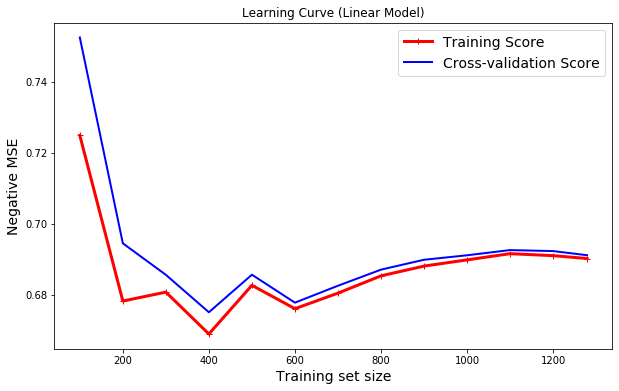

In [51]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores)
train_std = np.std(train_scores)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores)
val_std = np.std(val_scores)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes, val_scores, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("RMSE", fontsize=14) 
plt.title("Learning Curve (Linear Model)")
plt.show()

X shape = (1279, 12) #### learning_rate = 0.1   ##### Degree = 1 ## epoch:100
X shape = (1279, 78) #### learning_rate = 0.010000000000000002   ##### Degree = 2 ## epoch:100
X shape = (1279, 364) #### learning_rate = 0.0010000000000000002   ##### Degree = 3 ## epoch:100
X shape = (1279, 1365) #### learning_rate = 0.00010000000000000003   ##### Degree = 4 ## epoch:100
X shape = (1279, 4368) #### learning_rate = 1.0000000000000004e-05   ##### Degree = 5 ## epoch:100


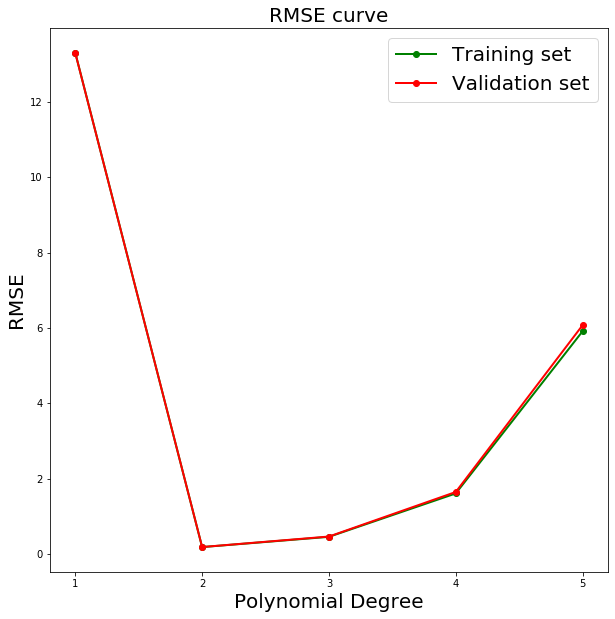

In [23]:
maxPolynomialDegree = 5
asn.plot_polynomial_model_complexity(asn.Linear_Regression, X_train, y_train, cv, maxPolynomialDegree, 
                                     learning_rate=0.1, epochs=100, tol=0.0001, regularizer=None, lambd=0)

In [20]:
linRg = Linear_Regression()
X_train = polynomialFeatures(X_train,5)
X_test = polynomialFeatures(X_test,5)

In [ ]:
X_train.shape
X_train = X_train[:600]
y_train = y_train[:600]

In [21]:

linRg.fit(X_train,y_train,learning_rate=0.0001,epochs=200,regularizer='l2',lambd= 1, tol=0.00001)

Epoch : 1     ||      Error : 21.752171186316737
Epoch : 2     ||      Error : 16.190064405037027
Epoch : 3     ||      Error : 13.319645458701839
Epoch : 4     ||      Error : 11.821767985943323
Epoch : 5     ||      Error : 11.023901689811913
Epoch : 6     ||      Error : 10.58317462510887
Epoch : 7     ||      Error : 10.32478155748993
Epoch : 8     ||      Error : 10.159601179900463
Epoch : 9     ||      Error : 10.04219565340555
Epoch : 10     ||      Error : 9.949397897794176
Epoch : 11     ||      Error : 9.869394945774578
Epoch : 12     ||      Error : 9.796162409048796
Epoch : 13     ||      Error : 9.726627052752225
Epoch : 14     ||      Error : 9.659220216434147
Epoch : 15     ||      Error : 9.593140317638147
Epoch : 16     ||      Error : 9.527976860612707
Epoch : 17     ||      Error : 9.463518747906644
Epoch : 18     ||      Error : 9.399656553444194
Epoch : 19     ||      Error : 9.336332699142
Epoch : 20     ||      Error : 9.27351605376619
Epoch : 21     ||      Erro

In [22]:

y_train_predicted_sgd = linRg.predict(X_train)
print(y_train_predicted_sgd)
y_test_predicted_sgd = linRg.predict(X_test)
print("Training: Mean squared error: %.2f"
      % mse(y_train, y_train_predicted_sgd))

print("Test: Mean squared error: %.2f"
      % mse(y_test, y_test_predicted_sgd))

[2.84837405 6.31395281 6.2191125  ... 5.61263604 8.10565901 3.2470637 ]
Training: Mean squared error: 3.13
Test: Mean squared error: 2.82


In [23]:
y_test_predicted_sgd = linRg.predict(X_test)
print("Test: Mean squared error: %.2f"
      % mse(y_test, y_test_predicted_sgd))

Test: Mean squared error: 2.82


In [22]:
linRg = SGD()
X_train = polynomialFeatures(X_train,3)
X_test = polynomialFeatures(X_test,3)

In [52]:

linRg.fit(X_train,y_train,learning_rate=1,epochs=1000,regularizer='l2',lambd= 0.1, tol=1)

Epochs needed: 1000


In [53]:

y_train_predicted_sgd = linRg.predict(X_train)
print(y_train_predicted_sgd)
y_test_predicted_sgd = linRg.predict(X_test)
print("Training: Mean squared error: %.2f"
      % mse(y_train, y_train_predicted_sgd))

print("Test: Mean squared error: %.2f"
      % mse(y_test, y_test_predicted_sgd))

[2.87393564 2.86914386 2.13018262 ... 1.89262196 2.09860504 2.21660794]
Training: Mean squared error: 10.00
Test: Mean squared error: 10.08
